In [1]:
# Data Analysis and Wrangling  
import numpy as np 
import pandas as pd 
import glob

# Visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 


In [2]:
path1 = "/Users/prashant/Downloads/Student-Placement-Guidance/Exploratory Data Analysis /Sem3Dec12.xlsx"
path2 = "/Users/prashant/Downloads/Student-Placement-Guidance/Exploratory Data Analysis /2015.xlsx"

In [3]:
sem_3_2015_df = pd.read_excel(path1)
results = pd.read_excel(path2)
results.head()

,NAME,Company
0,AMRE PRITAM,Vistaar
1,ASRANI BHARTI LACHMAN,Tech Mahindra
2,BAGWE KARAN VINAY,Infosys
3,BANDIVADEKAR RUTALI DILIP,Infosys
4,BELWALKAR MANALI C,Bista Solutions


In [4]:
sem_3_2015_df.index = sem_3_2015_df['Seat Number']
#sem_3_2015_df.head()

In [5]:
# Removing all unecessary columns 
sem_3_2015_df.drop(sem_3_2015_df.iloc[:,2:17], axis=1, inplace=True)
sem_3_2015_df.head()

,Seat Number,NAME,Total,Remarks
Seat Number,,,,
223201,223201,AMIN RISHITA VIJAYKUMAR,411,FAIL
223202,223202,AMRE PRITAM ANILKUMAR,566,PASS
223203,223203,ANSAN SUNNY SALAMA,376,FAIL
223204,223204,ASRANI BHARTI LACHMAN,529,PASS
223205,223205,BADE AMIT KERAMBA,421,FAIL


In [6]:
# Merge two excel sheets with NAME as a common column
sem_3_2015_merge = pd.merge(sem_3_2015_df, results, how='left')
sem_3_2015_merge.head(10)

,Seat Number,NAME,Total,Remarks,Company
0,223201,AMIN RISHITA VIJAYKUMAR,411,FAIL,NaN
1,223202,AMRE PRITAM ANILKUMAR,566,PASS,NaN
2,223203,ANSAN SUNNY SALAMA,376,FAIL,NaN
3,223204,ASRANI BHARTI LACHMAN,529,PASS,Tech Mahindra
4,223205,BADE AMIT KERAMBA,421,FAIL,NaN
5,223206,BAGWE KARAN VINAY,553,PASS,Infosys
6,223207,BANDIVADEKAR RUTALI DILIP,616,PASS,Infosys
7,223208,BARBHAYA RISHI DIVYESH,412,FAIL,NaN
8,223209,BELWALKAR MANALI CHANDRAKANT,500,PASS,NaN
9,223210,BHAGAT DOLLY DEEPAK,489,FAIL,NaN


In [7]:
# Replacing placement with binary values 

sem_3_2015_merge['Company'].loc[~sem_3_2015_merge['Company'].isnull()] = 1
sem_3_2015_merge['Company'].loc[sem_3_2015_merge['Company'].isnull()] = 0

sem_3_2015_merge.head()

/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Seat Number,NAME,Total,Remarks,Company
0,223201,AMIN RISHITA VIJAYKUMAR,411,FAIL,0
1,223202,AMRE PRITAM ANILKUMAR,566,PASS,0
2,223203,ANSAN SUNNY SALAMA,376,FAIL,0
3,223204,ASRANI BHARTI LACHMAN,529,PASS,1
4,223205,BADE AMIT KERAMBA,421,FAIL,0


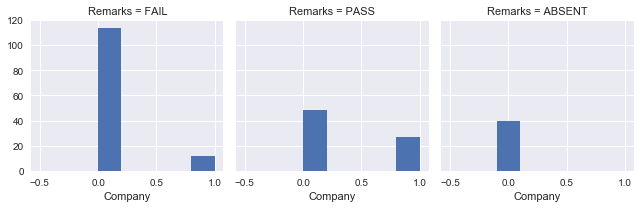

In [8]:
g = sns.FacetGrid(sem_3_2015_merge, col='Remarks')
g.map(plt.hist, 'Company', bins=5)

A simple histogram which correlates Remarks with placement of a student. From the graph we can conclude that **unplaced student contains high percentage of FAIL students**. This validates our assumption that failing of a student in certain exam has direct impact on his placement. 

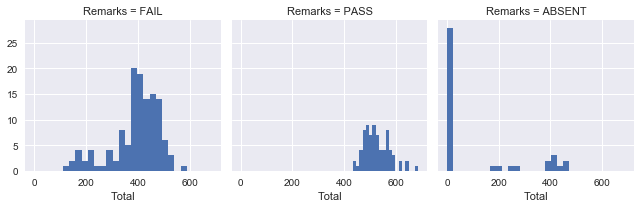

In [9]:
g = sns.FacetGrid(sem_3_2015_merge, col='Remarks')
g.map(plt.hist, 'Total', bins = 20)

A histogram compairing Total marks with Remarks which shows there is discrepancy in the data. Because the passing student and failing student range coincide with each other. Hence, **total marks cannot be a good parameter for training our model**

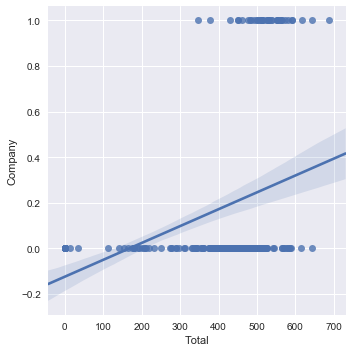

In [10]:
#for dataset in sem_3_2015_merge:
    #dataset['Remarks'] = dataset['Remarks'].map({'FAIL':0, 'PASS':1, 'ABSENT':2}).astype(int)

sns.lmplot(y='Company', x='Total', data=sem_3_2015_merge)

Another plot which proves our earlier hypothesis as true. This graph proves there is no concerete correlation between total marks and placement of a student. 